# Lesson 49: Central Limit Theorem I

### Teacher-Student Activities

In this class, you will learn about sampling distribution and Central Limit Theorem which is one of the most important theorems used in statistical inference. We will implement the Central Limit Theorem on a **Heart Disease dataset**. For this, we need to learn a simple concept called sampling. Before we continue further, let's load the heart disease dataset.

**Data Description**

The heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Columns|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type (4 values)|
|trestbps|resting blood pressure (in mm Hg on admission to the hospital)|
|chol|serum cholesterol in $\frac{mg}{dl}$|
|fbs|fasting blood sugar > 120 $\frac{mg}{dl}$|
|restecg|resting electrocardiographic results (values 0, 1, 2)|
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment|
|ca|number of major vessels (0-3) colored by fluoroscopy|
|thal|A blood disorder called thalassemia|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease




As you can see, we have taken a sample of 10 random cholesterol values from the `chol` column.

**Q: Why do we need to do sampling?**

Sometimes there is a need to draw some valid conclusions from a large group of individuals or the entire population. Suppose you need to find out the common symptoms found in the patient of heart disease. It may not be feasible or  impossible to examine the symptoms of the entire population. Instead we may examine only a small part or portion of the population known as **sample**. In this way, we can find out what are the common symptoms of heart disease found in patients for the entire population based on the results found in the sample.


**Mean of Samples**

We will draw several random samples and find their means. Then we will plot the means on a histogram. You will see that means of all the samples follow normal distribution. You have seen that it is easy to make probabilistic predictions using the normal distribution.

Let's plot the distribution of the `chol` column.

---

#### Activity 1: Loading Data

Load the heart disease dataset. Here's the dataset link:

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv


In [ ]:
# S1.1: Import the required modules and load the heart disease dataset. Also, display the first five rows.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's first look at the complete information on the `df` DataFrame.

In [ ]:
# S1.2: Apply the 'info()' function on the 'df' DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As you can see there are 303 entries for each column and no missing values. For implementing the Central Limit theorem, we need to choose a column having continuous numeric values. So, let's consider `chol` (cholesterol) column and plot its distribution.

---

#### Activity 2: Sampling

**Q: What is sampling?**

Sampling is a process of taking a few data points (or observations) from an entire column. Let's draw a sample of 10 cholesterol values from the `chol` column. For this, you need to use the `sample()` function from the `pandas` module. The source of the sample itself becomes the population. It takes an integer value as input which denotes the number of samples to be drawn.

**Syntax: `sample(n = num_of_samples)`**



In [ ]:
# S2.1: Draw a sample of 10 cholesterol values from the 'chol' column.
chol_series=df['chol']
chol_sample=chol_series.sample(n=10)
chol_series.size,chol_sample

(303,
 60     265
 5      192
 263    269
 50     256
 190    305
 269    283
 42     208
 134    306
 164    175
 257    200
 Name: chol, dtype: int64)

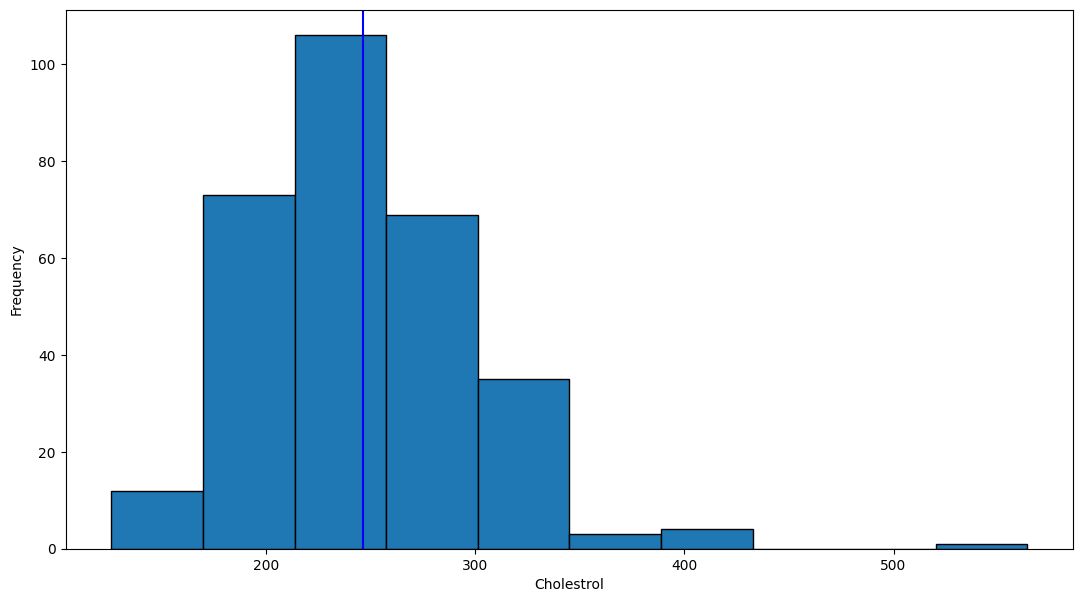

246.26402640264027


In [ ]:
# S2.2: Create a histogram for all the observations in the 'chol' column.
plt.figure(figsize=(13,7))
plt.hist(chol_series,bins='sturges',edgecolor='black')
plt.axvline(chol_series.mean(),color='blue')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()
print(chol_series.mean())

We can see that the vertical red line which indicates the mean of data is almost at the centre of  distribution. It is not exactly a normal distribution but close to it. The mean of population here is $246.264$ approx. The population mean is denoted as $\mu$. Thus, $\mu = 246.264$



---

#### Activity 3: Distribution of Means of Samples

Let's draw 300 samples from the `chol` columns each having 30 observations from the `chol` column and compute their means. Then let's create a histogram for the means of 300 samples.

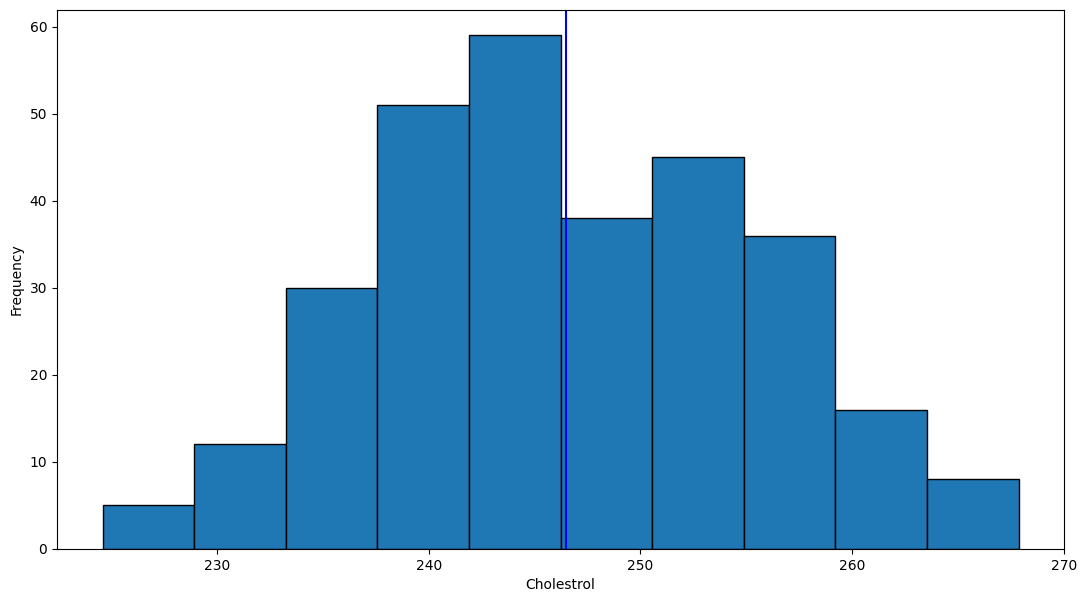

246.48777777777775


In [ ]:
# T3.1: Draw 300 samples from the 'chol' column each having 30 observations, compute their means and create a histogram for the means of samples.
mean_list=[]
num_samples=300
for i in range(num_samples):
  mean_list.append(chol_series.sample(n=30).mean())

plt.figure(figsize=(13,7))
plt.hist(mean_list,bins='sturges',edgecolor='black')
plt.axvline(np.mean(mean_list),color='blue')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()
print(np.mean(mean_list))

In the above code:

1. We created an empty list to store the means of 300 samples.

2. Using the `sample()` function, we took 300 samples from the `chol` column each having 30 different cholesterol observations.

3. Using the `mean()` function, we calculated the mean for each sample containing 30 cholesterol values.

4. Using the `append()` function, we added each sample mean to the `mean_list`

5. We created a histogram for all the 300 means of 300 different samples.

6. The mean of all the sample means turn out to be approx 246 which is close to the mean of all the values in the `chol` column. This is very important observation

*If we take several samples of a dataset (or population) such that each sample contains sufficient number of observations, then the means of all the sample means will be very close or nearly equal to the population mean*

This is called **Central Limit Theorem (CLT)**. Also, the means of all the samples follow normal distribution (or bell curve). However, the following two factors must be satisfied:

*   For an accurate normal distribution, the sample sizes should be large.

*   The more closely the original population resembles a normal distribution, less sample size will be required. In our case the original shape of the distribution for the `chol` column was almost normal. Hence the sample size of 30 was good enough. However, if the original population is not normal (may be badly skewed, has multiple peaks, or has many outliers), sample size must be larger than 30.

Let's again take 300 samples and observe the distributions for the means of different samples each having sample sizes $n = 500, 1000, 10000$

**Note:** The `chol` column has exactly 303 values. So, to create a sample of 500 values, we have to provide another input `True` which is a value to the `replace` parameter inside the `sample()` function.

**Syntax:** `sample(n = num_of_samples, replace = True)`

`replace = True` denotes that repeat the values from the `chol` column (population in general).




<ipython-input-12-ba95214b2bfd>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(meanlist1,hist=True,bins='sturges',label='500')
<ipython-input-12-ba95214b2bfd>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(meanlist2,hist=True,bins='sturges',label='1000')
<ipython-input-12-ba95214b2bfd>:13:

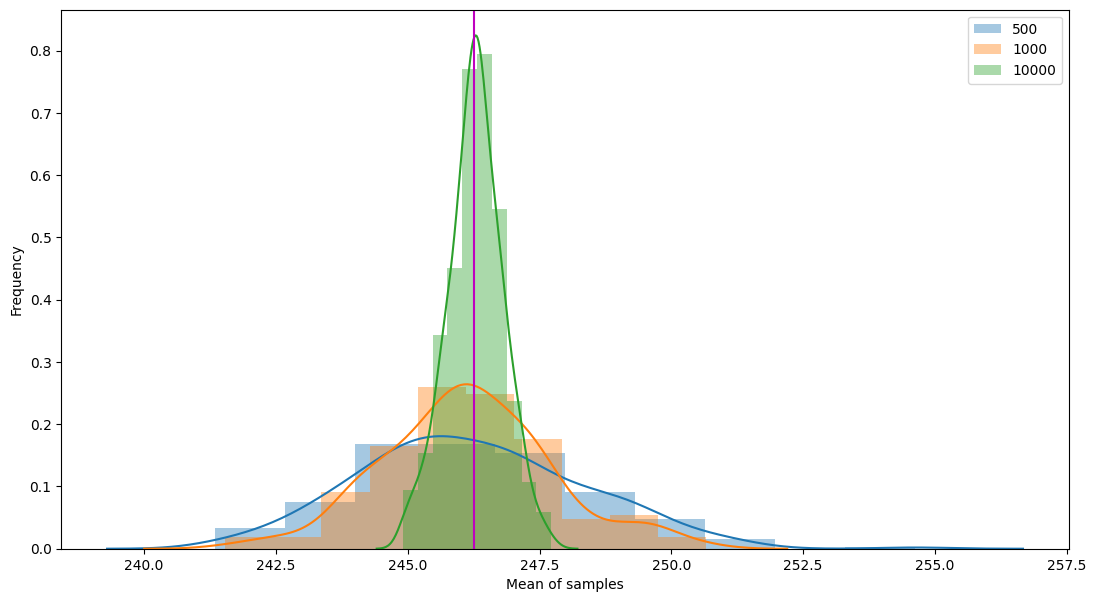

246.2153866666667
246.13219
246.28018033333336


In [12]:
# S3.1: Create histogram for the means of the samples of the sizes 500, 1000, 10000.
meanlist1=[]
meanlist2=[]
meanlist3=[]
num_sample=300
for i in range(num_sample):
  meanlist1.append(chol_series.sample(n=500,replace=True).mean())
  meanlist2.append(chol_series.sample(n=1000,replace=True).mean())
  meanlist3.append(chol_series.sample(n=10000,replace=True).mean())
plt.figure(figsize=(13,7))
sns.distplot(meanlist1,hist=True,bins='sturges',label='500')
sns.distplot(meanlist2,hist=True,bins='sturges',label='1000')
sns.distplot(meanlist3,hist=True,bins='sturges',label='10000')
plt.axvline(chol_series.mean(),color='m')
plt.xlabel('Mean of samples')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(np.mean(meanlist1))
print(np.mean(meanlist2))
print(np.mean(meanlist3))

You may notice that as the sample size increases, the distribution of means of all the samples tends to look more and more like a normal distribution and groups more closely around the population mean (shown by the red vertical line).

Try to draw a sample having more than 303 values using the `sample()` function with passing `replace = False` as an input.

**Note:** You should get `ValueError` with the following message:

```
ValueError: Cannot take a larger sample than population when 'replace=False'
```




In [13]:
# S3.2: Draw a sample having more than 303 values using the 'sample()' function with passing replace = False as an input.
chol_series.sample(n=304,replace=False)

ValueError: ignored

Let's see what happens when the sample size of all the samples is very small.


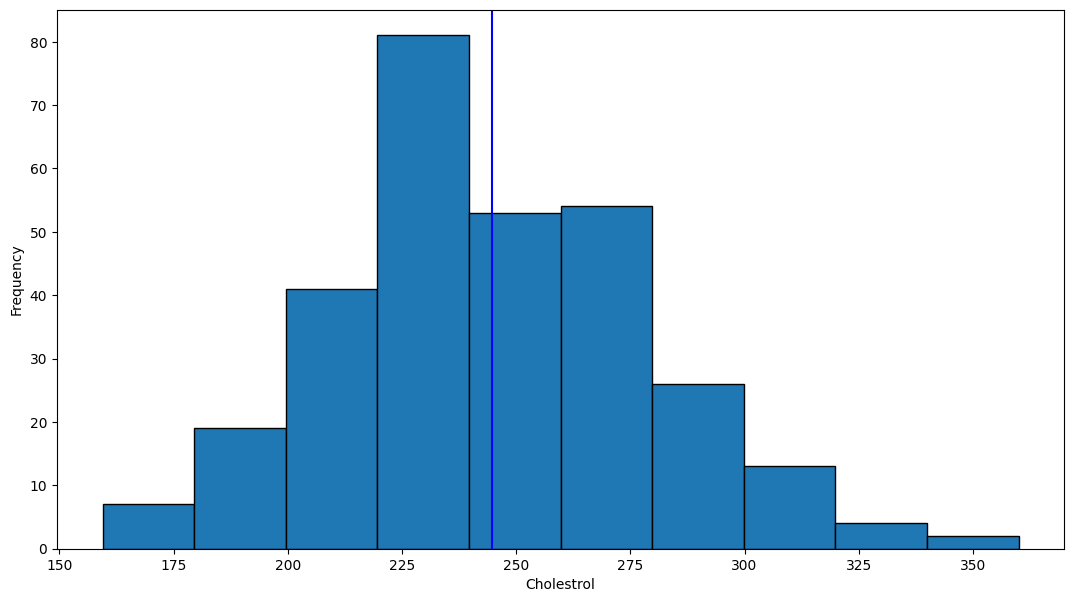

244.66


In [14]:
# S3.3: Take 300 samples each having 2 observations, calculate their means and create the histogram for means of all the samples.
mean_list=[]
num_samples=300
for i in range(num_samples):
  mean_list.append(chol_series.sample(n=2).mean())

plt.figure(figsize=(13,7))
plt.hist(mean_list,bins='sturges',edgecolor='black')
plt.axvline(np.mean(mean_list),color='blue')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()
print(np.mean(mean_list))

Here you can notice that even when the sample size is very small, i.e., $n = 2$, the distribution of the mean of samples is normal. This is because the population (`chol` column ) follows normal distribution approximately.

---

### **Project**
You can now attempt the **Applied Tech Project 49 - CLT** on your own.

**Applied Tech Project 49 - CLT**: https://colab.research.google.com/drive/1EzZZDyLyE6p3n76YSJ0PY7SH0hM2fSeZ

---